Overview
--

This data set includes scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them

**Research Questions**

------------

- How helpfull is the test preparation course?
- Which major factors contribute to test outcomes?
- Beyond preparation test what are the secondary feature that could affect the final score?

In [41]:
# import libraries we need for EDA
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn import metrics

In [2]:
# importing our file
students_df = pd.read_csv('StudentsPerformance.csv')

In [3]:
# Look at the top 5 rows, uncomment the line below to run the code
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Look at the last 5 rows, uncomment the line below to run the code
students_df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


> This data set consists of the marks secured by the students in various subjects.

In [5]:
# Let's take a look on columns, shape and descriptive information of our data set
# uncomment the line below to run the code
students_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
# Shape of our dataset
# uncomment the line below to run the code
students_df.shape

(1000, 8)

In [7]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


>As we can see our data set is very clean with no *Null values* and all columns are the correct type as we expected. There are 5 columns that contain categorical values and 3 of numeric (integers) values.

In [8]:
# Summary statistics of our numeric columns of entire dataset
students_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- All numeric columns have almost equal *standard deviations* and *mean values* are very similar. 
- Mininmum score of all subjects is 0. It is possible to be an outlier but as long as it is not a negative number we can consider it as normal (a student it is possible to take 0 score for some reason).

In [9]:
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

In [10]:
# Counts on categorical columns
for feature in categorical_features:
    print(feature,':')
    print(students_df[feature].value_counts())
    print('----------------------------')

gender :
female    518
male      482
Name: gender, dtype: int64
----------------------------
race/ethnicity :
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
----------------------------
parental level of education :
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
----------------------------
lunch :
standard        645
free/reduced    355
Name: lunch, dtype: int64
----------------------------
test preparation course :
none         642
completed    358
Name: test preparation course, dtype: int64
----------------------------


>We are going to plot all the categorical columns to see the differences. Counts between our categories differ a lot except for the *gender* column

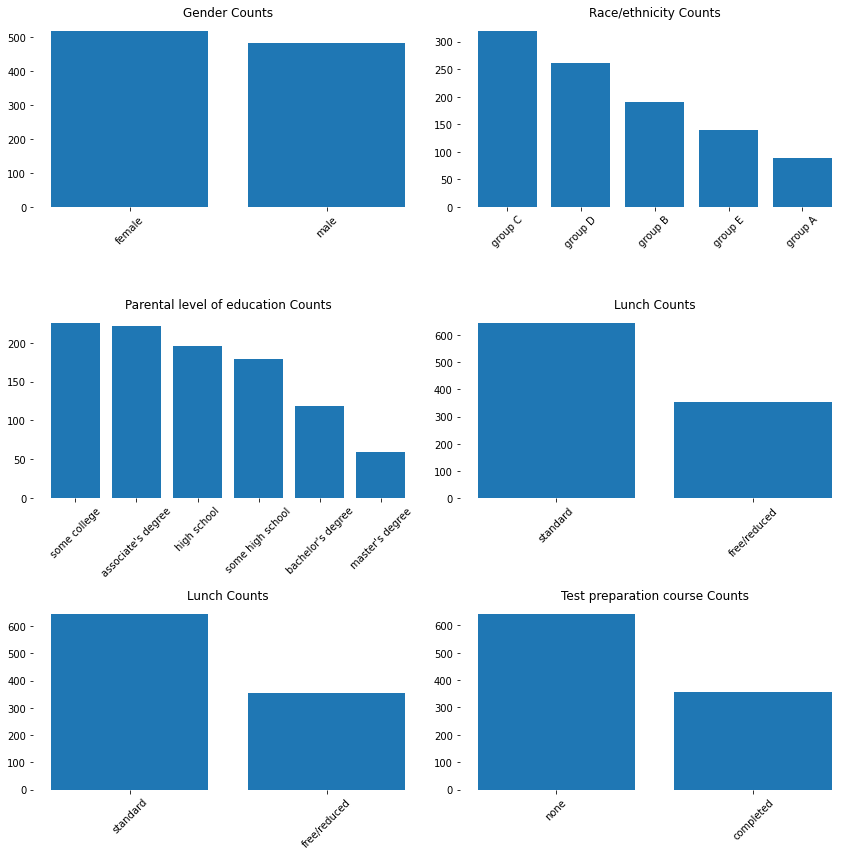

In [11]:
fig, axes = plt.subplots(3,2, figsize=(12,12))

def get_x_labels(column):
    """helper function to get all xlabels for all axes"""
    col_dict = dict(students_df[column].value_counts())
    return col_dict.keys()

x_labels = [list(get_x_labels(feature)) for feature in categorical_features]

def get_y_ticks(column):
    """helper function to get all heights for all axes"""
    return students_df[column].value_counts()

y_ticks = [list(get_y_ticks(feature)) for feature in categorical_features]

for i in range(3):
    for j in range(2):
        if i==1:
            axes[i,j].bar(x_labels[i+j+1], y_ticks[i+j+1])
            axes[i,j].set_frame_on(False)
            axes[i,j].set_xticklabels(x_labels[i+j+1], rotation=45)
            axes[i,j].set_title('{} Counts'.format(categorical_features[i+j+1].capitalize()))
            axes[i,j].minorticks_off()
        elif i==2:
            axes[i,j].bar(x_labels[i+j+1], y_ticks[i+j+1])
            axes[i,j].set_frame_on(False)
            axes[i,j].set_xticklabels(x_labels[i+j+1], rotation=45)
            axes[i,j].set_title('{} Counts'.format(categorical_features[i+j+1].capitalize()))
        else:
            axes[i,j].bar(x_labels[i+j], y_ticks[i+j])
            axes[i,j].set_frame_on(False)
            axes[i,j].set_xticklabels(x_labels[i+j], rotation=45)
            axes[i,j].set_title('{} Counts'.format(categorical_features[i+j].capitalize()))
plt.tight_layout()
plt.show()

Let me explain the above code:

- *fig, axes = plt.subplots(3,2, figsize=(12,12))*:
    - creates a figure, you can think of that like a white paper onto which we are going to draw our plots (you can take a look the code below to get a better understanding)
    - axes are just the horizontal axis $x$ and the vertical axis $y$
    - this line creates a white paper with $3X2$ grid of axes $x$,$y$
    - so we can think of axes as objects which we can add, remove, draw anything we want
- *axes[i,j].bar(x, y, more params)*:
    - creates a bar plot (usually we use barplots to plot categorical variables)
- *axes[i,j].set_frame_on(False)*:
    - removes the lines of the axes $x$ and $y$ but keeps the ticks (think of that like if you have draw the axes with a pencil you could take an eraser and remove the lines)
- *axes[i,j].set_xticklabels(label, rotation=45, more params)*:
    - adds ticks and labels on the x-axis rotated by $45^o$
- *axes[i,j].set_title('{} Counts'.format(categorical_features[i+j].capitalize()))*:
    - adds a title for our plot

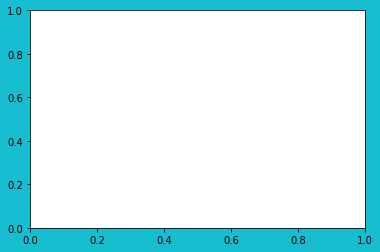

In [12]:
#To help you understand better, what we mean by figure and by axes
#below I use a very nice way to clarify those.

fig_new, ax = plt.subplots()

fig_new.set_facecolor('tab:cyan') #our paper has cyan color, our axes in white color

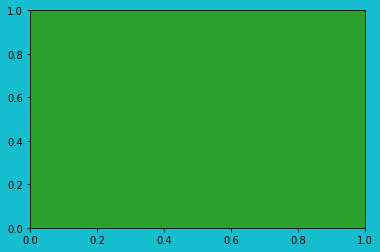

In [13]:
ax.set_facecolor('tab:green') #our axes now has green color
fig_new

--------

#### I would like to highlight the following notes:

- Two thirds of our students DIDN'T took the test preparation course
- Group A of Race/Ethinicity column has the minimum number of representatives, it is more than 3 times smaller than the Group C
- Μost counts of Parental Level of Education has the 'Some College' and the less counts has the 'Master's Degree'.

We could split our dataset into smaller to analyze each one category seperately.

In [14]:
numeric_features = ['math score', 'reading score', 'writing score']

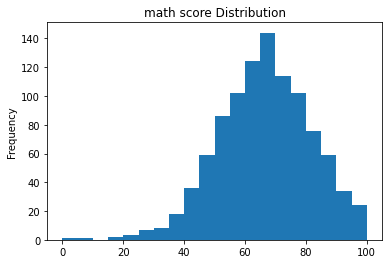

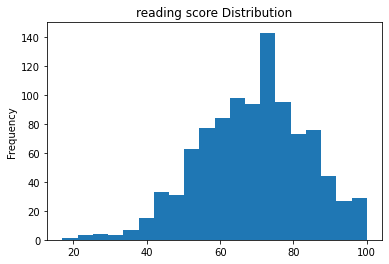

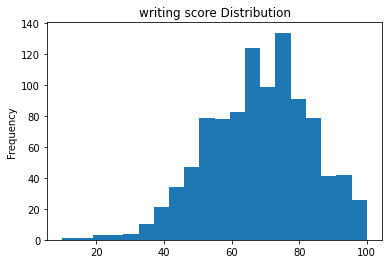

In [15]:
# First of all let us take a look on 
# the distribution of each numeric column

for feature in numeric_features:
    students_df[feature].plot(kind='hist', bins=20)
    plt.title('{} Distribution'.format(feature))
    plt.show()

In [16]:
# We print all the minimum values for each numeric feature

print('The minimum score for Maths is: {}'.format(students_df['math score'].min()))
print('The minimum score for Reading is: {}'.format(students_df['reading score'].min()))
print('The minimum score for Writing is: {}'.format(students_df['writing score'].min()))

The minimum score for Maths is: 0
The minimum score for Reading is: 17
The minimum score for Writing is: 10


Next step is to visualize the performance of each category of each categorical feature.

We will make use of boxplots and groupby each category our dataset because:

- We can take the minimum(lower cap) and maximum(upper cap) value,
- We can take the median(green line),
- We can take quartiles, 25%(bottom of the box), 50%(is the same as median), 75%(top of the box),
- outliers (circles)

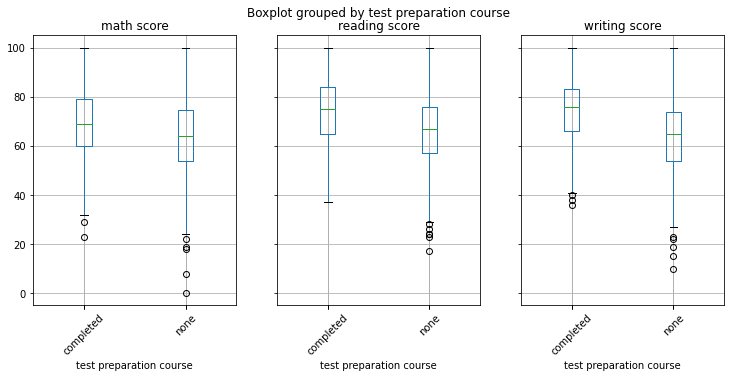

In [17]:
students_df.boxplot(column=numeric_features, by='test preparation course', rot=45, figsize=(12,5), layout=(1,3));

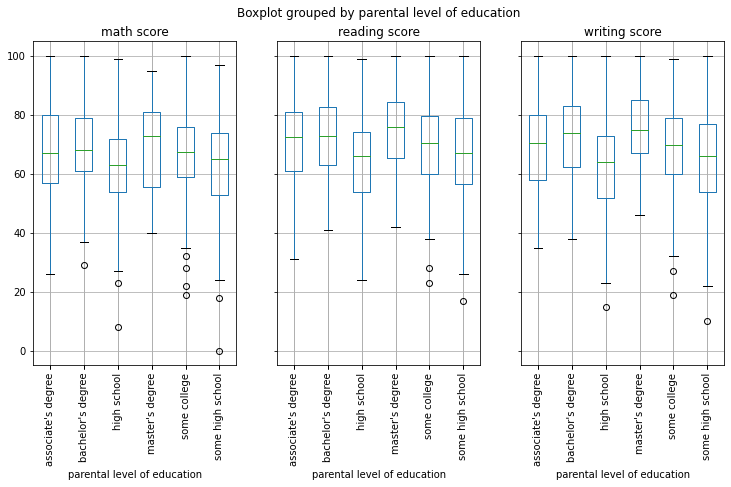

In [18]:
students_df.boxplot(column=numeric_features, by='parental level of education', rot=90, figsize=(12,6), layout=(1,3));

Let's start our analysis. I am going to start first with the *Test Preparation Course*. A first note is that: 
- outliers in any of math/reading/writing course for those who completed the test preparation course(TPC) are very similar to minimum value while for those who didn't completed TPC not.

- Moreover, scores for those who completed the TPC has smaller variance, the body of the box is everywhere higher than the others and the whiskers are shorter.

In my opinion if a student completed the TPC then has more chances to get a better score! So yes, TPC does affects the scores.

Another interesting plot is *Parental Level of Education*. 
- Master's Degree does a bit better than bachelor's Degree
- Master's and Bachelor's Degree has long bodies and short whiskers, almost no outliers(only one) and always higher median than the others
- Very steady is the level of Associate Degree it has almost the same values on all three courses

I believe that Parental's Level of Education affects a student's score. But our samples aren't equally so I think that a better collected dataset could give us more distinct results.

Summary Statistics for Parental Level of Education and Test Preparation Course
--

In [19]:
# We are going to split our dataset to smaller,
# one for each category, and compare their statistics
# with the overall statistics.

df_compl = students_df[students_df['test preparation course'] == 'completed']
df_notcompl = students_df[students_df['test preparation course'] == 'none']

In [20]:
# A good way to decide if and how the test preparation course helped,
# is to compare the mean values of our two subsets to the entire dataset
print(students_df.mean() - df_compl.mean())
print(students_df.mean() - df_notcompl.mean())

math score      -3.606531
reading score   -4.724855
writing score   -6.364994
dtype: float64
math score       2.011118
reading score    2.634732
writing score    3.549327
dtype: float64


This is very nice! For sure, the results for those who did took the preparation course are much better!

In [21]:
print(students_df.std() - df_compl.std())
print('--------------')
print(students_df.std() - df_notcompl.std())

math score       0.718381
reading score    0.961808
writing score    1.820322
dtype: float64
--------------
math score      -0.029296
reading score    0.136307
writing score    0.195996
dtype: float64


Standard Deviation shows again that our subset that completed TPC, has less variance to their scores.

>As plots shown above if a student completes the TPC has much more chances to get high score to exams.

In [22]:
df_BD = students_df[students_df['parental level of education'] == "bachelor's degree"]
df_MD = students_df[students_df['parental level of education'] == "master's degree"]
df_sc = students_df[students_df['parental level of education'] == 'some college']
df_AD = students_df[students_df['parental level of education'] == "associate's degree"]
df_hs = students_df[students_df['parental level of education'] == 'high school']
df_shs = students_df[students_df['parental level of education'] == 'some high school']

In [23]:
print(students_df.mean() - df_BD.mean())
print('--------------')
print(students_df.mean() - df_MD.mean())
print('--------------')
print(students_df.mean() - df_sc.mean())
print('--------------')
print(students_df.mean() - df_shs.mean())
print('--------------')
print(students_df.mean() - df_hs.mean())
print('--------------')
print(students_df.mean() - df_AD.mean())

math score      -3.300831
reading score   -3.831000
writing score   -5.327356
dtype: float64
--------------
math score      -3.656763
reading score   -6.203881
writing score   -7.623966
dtype: float64
--------------
math score      -1.039319
reading score   -0.291177
writing score   -0.786708
dtype: float64
--------------
math score       2.591793
reading score    2.230453
writing score    3.165732
dtype: float64
--------------
math score       3.951245
reading score    4.464918
writing score    5.605020
dtype: float64
--------------
math score      -1.793883
reading score   -1.758928
writing score   -1.842396
dtype: float64


In [24]:
print(students_df.std() - df_BD.std())
print('--------------')
print(students_df.std() - df_MD.std())
print('--------------')
print(students_df.std() - df_sc.std())
print('--------------')
print(students_df.std() - df_shs.std())
print('--------------')
print(students_df.std() - df_hs.std())
print('--------------')
print(students_df.std() - df_AD.std())

math score       0.219291
reading score    0.314942
writing score    0.467395
dtype: float64
--------------
math score       0.009165
reading score    0.825029
writing score    1.464946
dtype: float64
--------------
math score       0.850183
reading score    0.543143
writing score    0.183326
dtype: float64
--------------
math score      -0.764909
reading score   -0.879103
writing score   -0.540540
dtype: float64
--------------
math score       0.623430
reading score    0.468061
writing score    1.109750
dtype: float64
--------------
math score       0.050987
reading score    0.731244
writing score    0.884535
dtype: float64


Great notes!!! As we expected, Master's/ Bachelor's/ Associate's Degree did better than the entire dataset and a bit better also did Some College. 

>In conclusion I think that also Parental Level of Education affects a student's score

Linear Regression - Score Prediction
--

In [25]:
students_dummies = pd.get_dummies(students_df, drop_first=True, columns=categorical_features)
students_dummies.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1


Heatmap also highlights the strong correlation that reading and writing have with the math score. Secondary feature that shows an interesting amount of correlation is the lunch. 

Linear Regression Model
--

> This model will keep two out of three scores and we are going to predict the third. *Reading & Writing Scores* are kept, *math score* is the target variable.

In [26]:
features = ['reading score', 'writing score', 'gender_male',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_bachelor\'s degree',
       'parental level of education_high school',
       'parental level of education_master\'s degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_standard',
       'test preparation course_none']

In [27]:
target = ['math score']

In [28]:
class ColumnLinearRegression(BaseEstimator, RegressorMixin):
     """
     This is an Estimator class. Columns are a "Hyperparameter" for our estimator, 
     so we have to pass it in, in the __inti__ method,
     we need to keep track of the columns, so we have to save them
     """
        
    def __init__(self, columns):
        if not isinstance(columns, list):
            raise ValueError("columns must be a list")
        self.columns= columns
        self.lr = LinearRegression()
        
    def _select(self, X):
        """
        Helper function to select the columns of interest
        """
        return X[self.columns]
        
    def fit(self, X, y):
        """
        Fitting our model on train sets
        X: the train dataset that contains the independent variables
        y: the train dataset that contains the target values
        """
        self.lr.fit(self._select(X), y)
        return self
    
    def predict(self, X):
        """
        This function is used to predict the target values.
        X: is the dataframe that contains the independent variables
        """
        
        return self.lr.predict(self._select(X))

In [29]:
def r2_adj(y_t, X_t, feat, pred):
    """
     Adjusted R2 also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. 
     If you add more and more useless variables to a model, adjusted r-squared will decrease. 
     If you add more useful variables, adjusted r-squared will increase.
     
     feat: features to use
     pred: predictions our model made
     y_t: test's dataset target values
     X_t: test dataset contains independent variables
    """
    r2 = metrics.r2_score(y_t, pred)
    n = len(X_t)
    p = len(feat)
    return 1-((1-r2)*(n-1)/(n-p-1))

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

Another common metric for regression is $R^2$, also known as the **coefficient of determination**. The $R^2$ quantifies how our model's MSE compares to a naive model in which we always predict the mean $y$ value, $\bar{y}$.

$$ 1 - \frac{\sum_i \left[f(X_i) - y_i\right]^2}{\sum_i\left(\bar{y} - y_i\right)^2} $$

If our $R^2 < 0$ we know our model is very bad, because the MSE is larger than than the MAE of the mean model.

One important consideration when choosing a metric is how they scale with the data.

In [30]:
feat_list = []
new_dict = {}
i=0
r2_adj_max = 0
best_model = None
for feature in features:
    feat_list.append(feature)
    clr = ColumnLinearRegression(feat_list)
    X_train, X_test, y_train, y_test = train_test_split(students_dummies[feat_list], students_dummies[target], 
                                                    test_size=0.3, random_state=42)
    clr.fit(X_train, y_train)
    predictions = clr.predict(X_test)
    variables = len(clr.columns)
    mse = metrics.mean_squared_error(y_test, predictions)
    r2 = metrics.r2_score(y_test, predictions)
    r2_adjusted = r2_adj(y_test, X_test, clr.columns, predictions)
    if r2_adjusted > r2_adj_max:
        best_model = clr
        r2_adj_max = r2_adjusted
        new_dict[i] = {'var': variables, 
                       'MSE': mse,
                       'R^2': r2, 
                       'R^2_adjusted': r2_adj_max}
    else:
        feat_list.remove(feat_list[-1])
    i+=1
print(best_model.columns)    

['reading score', 'writing score', 'gender_male', 'race/ethnicity_group C', 'race/ethnicity_group E', "parental level of education_bachelor's degree", "parental level of education_master's degree", 'lunch_standard', 'test preparation course_none']


In [31]:
df = pd.DataFrame(new_dict)
df.head()

,0,1,2,4,6,7,9,12,13
MSE,82.630205,81.655522,38.727046,38.380858,36.434819,36.229617,35.886807,33.723228,30.324038
R^2,0.667899,0.671817,0.844351,0.845743,0.853564,0.854389,0.855767,0.864462,0.878124
R^2_adjusted,0.666785,0.669607,0.842774,0.843651,0.851074,0.851407,0.852309,0.860736,0.874342
var,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000


No handles with labels found to put in legend.


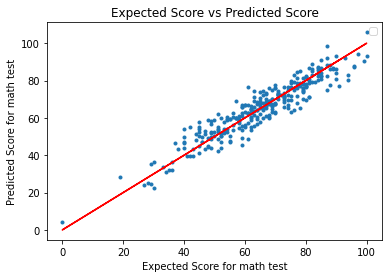

In [35]:
# plotting our predictions over the real y-values are a good way, 
# beyond the statistical, to check our model performance

plt.plot(y_test, predictions, '.')
plt.xlabel('Expected Score for math test')
plt.ylabel('Predicted Score for math test')
plt.title('Expected Score vs Predicted Score')
plt.plot(y_test,y_test,'r-')
plt.legend()
plt.show()

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', metrics.r2_score(y_test, predictions))
print('R^2_adjusted:', r2_adj(y_test, X_test, features, predictions))

MAE: 4.373118578221514
MSE: 30.32403830306437
RMSE: 5.506726641396354
R^2: 0.8781240204609078
R^2_adjusted: 0.8721371302379348


In [44]:
clr = ColumnLinearRegression(['reading score', 'writing score', 'gender_male', 
                              'race/ethnicity_group E', "parental level of education_bachelor's degree", 
                              "parental level of education_master's degree", 'lunch_standard', 'test preparation course_none'])

X_train, X_test, y_train, y_test = train_test_split(students_dummies[clr.columns], students_dummies[target], 
                                                    test_size=0.3, random_state=42)

clr.fit(X_train, y_train)
predictions = clr.predict(X_test)
variables = len(clr.columns)
mse = metrics.mean_squared_error(y_test, predictions)
r2 = metrics.r2_score(y_test, predictions)
r2_adjusted = r2_adj(y_test, X_test, clr.columns, predictions)

print('R^2:', r2)
print('R^2_adjusted:', r2_adjusted)

R^2: 0.8781801978922374
R^2_adjusted: 0.8748311998961478


Conclusions
====

- Our model did good enough with values that hadn't seen before. 
- The best model came with 13 feature as expected the more feature the better the performance. Notice that even with the dummies variable we had a good portion of features and rows.
- **R<sup>2</sup>** shows how well terms (data points) fit a curve or line. **Adjusted R<sup>2</sup>** also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, **adjusted R<sup>2</sup>** will decrease. If you add more useful variables, **adjusted R<sup>2</sup>** will increase. **Adjusted R<sup>2</sup>** will always be less than or equal to **R<sup>2</sup>**. ([Source](https://www.statisticshowto.com/adjusted-r2/))